
# Credit Score Modeling - XAI Project

## Step 1: Importing Necessary Libraries
We start by importing the essential Python libraries for data manipulation, visualization, and machine learning.


In [46]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Random Forest Classifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# ONE HOT ENCODER
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

## Step 2: Loading the Dataset
We load the training and test datasets and inspect their structure.

In [47]:
# Load the training dataset
train_file_path = "data/cs-training.csv"
test_file_path = "data/cs-test.csv"

train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)


train_df.info()
test_df.info()


train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Step 3: Handling Missing Values
We check for missing values and decide on the best strategy to handle them.

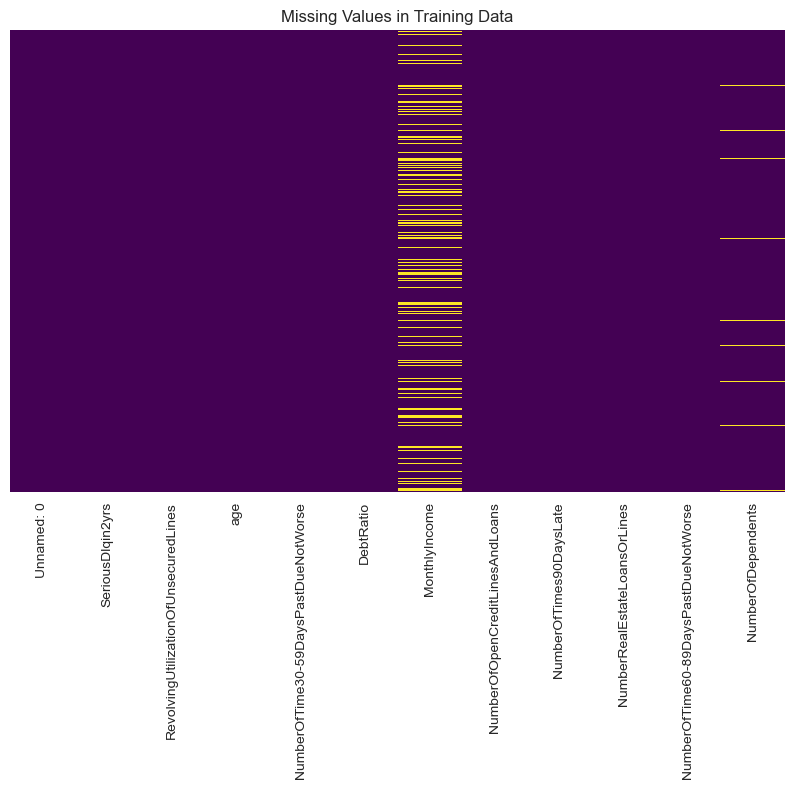

In [48]:
# Check for missing values in training dataset
train_df.isnull().sum()

# Visualizing missing data
plt.figure(figsize=(10,6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values in Training Data")
plt.show()

## Step 4: Data Cleaning
- Drop unnecessary columns (e.g., `Unnamed: 0` if redundant)
- Fill or remove missing values in `MonthlyIncome` and `NumberOfDependents`

In [49]:
# Dropping the index column if it exists
if 'Unnamed: 0' in train_df.columns:
    train_df.drop(columns=['Unnamed: 0'], inplace=True)

if 'Unnamed: 0' in test_df.columns:
    test_df.drop(columns=['Unnamed: 0'], inplace=True)

In [51]:
# Fill missing MonthlyIncome with median
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].median())
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].median())

# Fill missing NumberOfDependents with mode
train_df['NumberOfDependents'] = train_df['NumberOfDependents'].fillna(train_df['NumberOfDependents'].mode()[0])
test_df['NumberOfDependents'] = test_df['NumberOfDependents'].fillna(test_df['NumberOfDependents'].mode()[0])


In [52]:
# Verify missing values are handled
train_df.isnull().sum(), test_df.isnull().sum()


(SeriousDlqin2yrs                        0
 RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 NumberOfTime30-59DaysPastDueNotWorse    0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfOpenCreditLinesAndLoans         0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 NumberOfDependents                      0
 dtype: int64,
 SeriousDlqin2yrs                        101503
 RevolvingUtilizationOfUnsecuredLines         0
 age                                          0
 NumberOfTime30-59DaysPastDueNotWorse         0
 DebtRatio                                    0
 MonthlyIncome                                0
 NumberOfOpenCreditLinesAndLoans              0
 NumberOfTimes90DaysLate                      0
 NumberRealEstateLoansOrLines                 0
 NumberOfTime60-89DaysPastDueNotWorse         0
 NumberOfDependents             

## Step 5: Exploratory Data Analysis (EDA)
We perform statistical and graphical analysis to understand patterns, correlations, and potential biases.

In [53]:
# Summary statistics
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


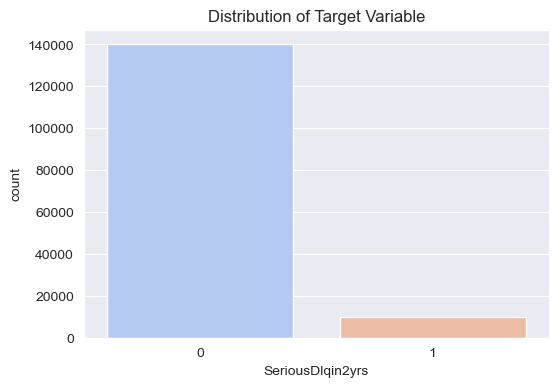

In [54]:

# Visualizing target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SeriousDlqin2yrs', data=train_df, hue='SeriousDlqin2yrs', palette='coolwarm', legend=False)
plt.title("Distribution of Target Variable")
plt.show()

## Step 6: Feature Correlation Analysis
Understanding correlations between features to identify key predictors.

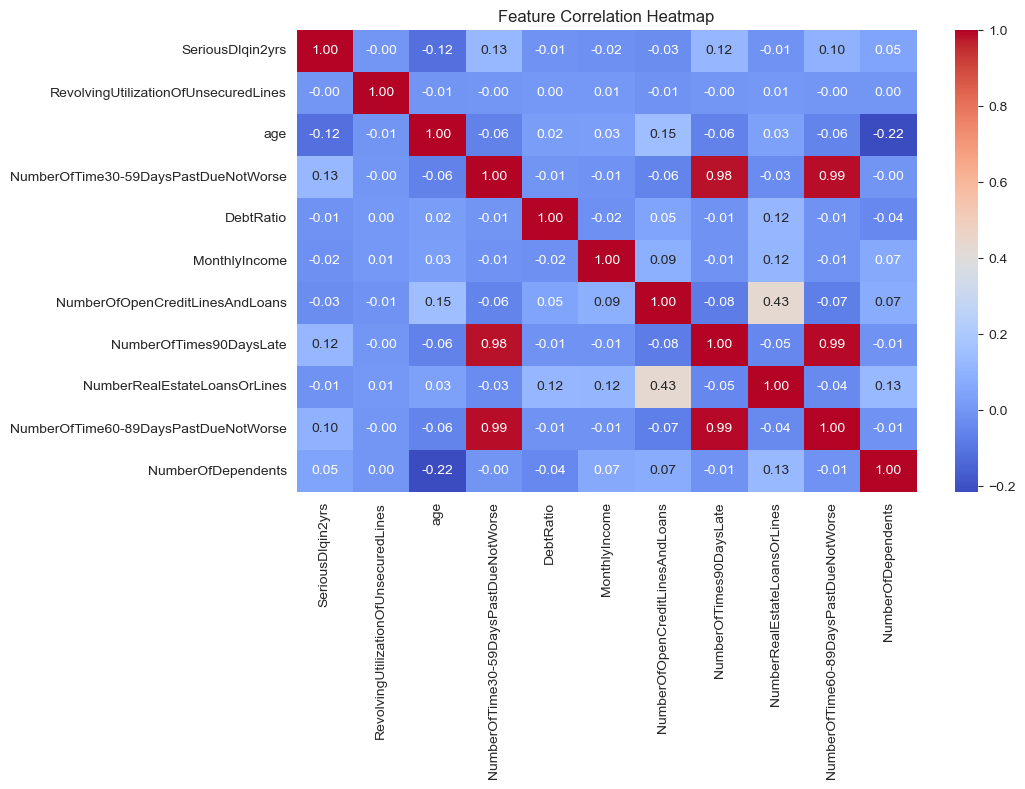

In [55]:

plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 6: Feature Correlation Analysis
Understanding correlations between features to identify key predictors.

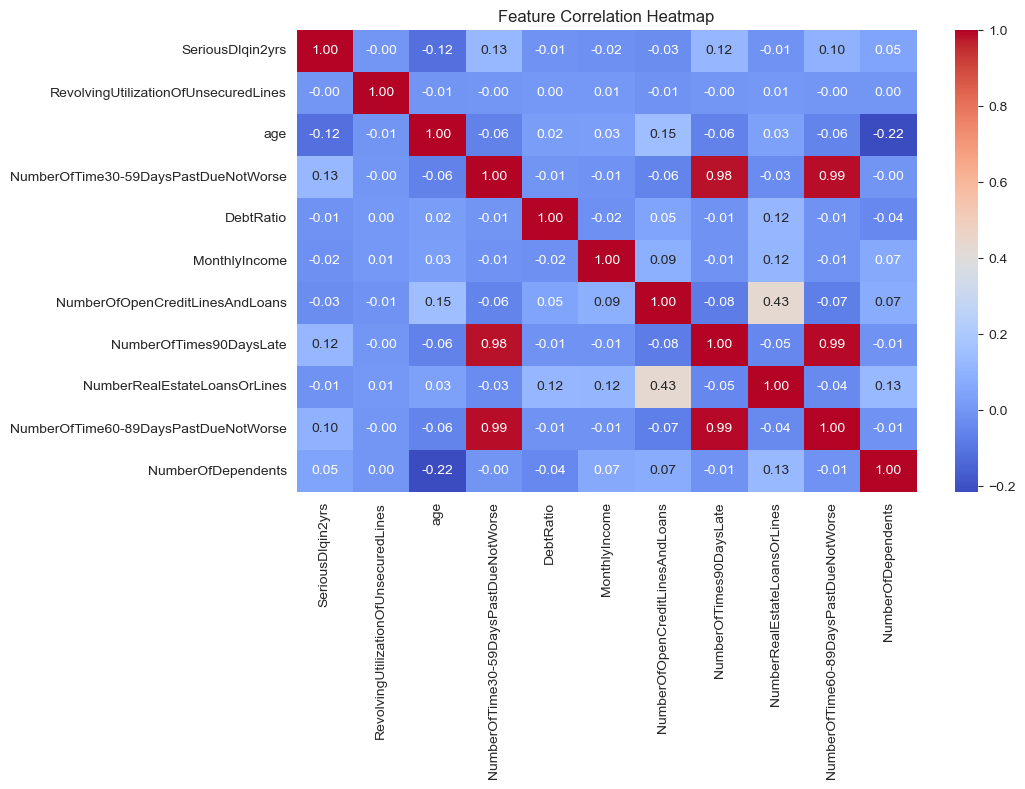

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


## Step 7: Feature Importance Analysis
We use a RandomForestClassifier to determine the most important features impacting the target variable.

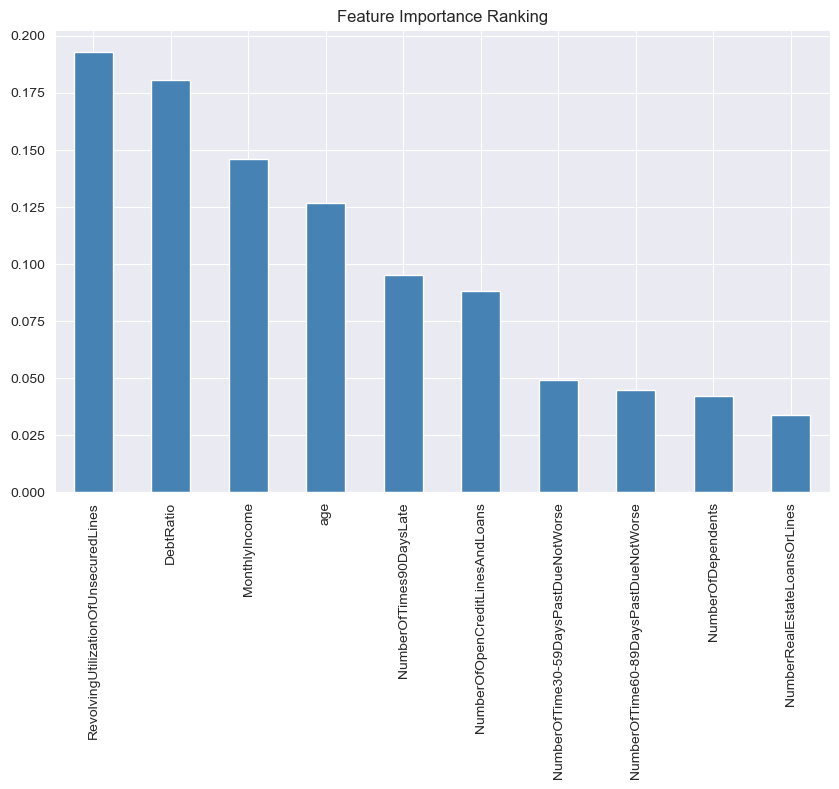

In [57]:
# Separating target variable
y = train_df['SeriousDlqin2yrs']
X = train_df.drop(columns=['SeriousDlqin2yrs'])

# Train a basic RandomForest model for feature importance analysis
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X.fillna(0), y)  # Fill missing values with 0 to avoid errors

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualizing feature importances
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar', color='steelblue')
plt.title("Feature Importance Ranking")
plt.show()


## Step 8: Feature Engineering
Feature transformation and preparation for model training.
- **Removing Low-Importance Features:** Drop features with very low importance
- **Scaling:** Normalize numerical features using `StandardScaler`
- **Encoding:** Convert categorical variables into numerical values if necessary
- **Splitting:** Prepare train-test datasets for model training

In [58]:
# Step 1: Drop low-importance features

# Drop 'SeriousDlqin2yrs' from both training and test datasets
if 'SeriousDlqin2yrs' in X.columns:
    X = X.drop(columns=['SeriousDlqin2yrs'])
if 'SeriousDlqin2yrs' in test_df.columns:
    test_df = test_df.drop(columns=['SeriousDlqin2yrs'])

# Drop low-importance features from both training and test datasets
low_importance_features = feature_importances[feature_importances < 0.01].index
X = X.drop(columns=low_importance_features)
test_df = test_df.drop(columns=low_importance_features)

# Step 2: Handle categorical variables (if any)
categorical_cols = X.select_dtypes(include=["object", "category"]).columns
if len(categorical_cols) > 0:
    encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
    X_categorical_encoded = encoder.fit_transform(X[categorical_cols])
    test_categorical_encoded = encoder.transform(test_df[categorical_cols])

    # Drop original categorical columns and concatenate encoded ones
    X = X.drop(columns=categorical_cols)
    test_df = test_df.drop(columns=categorical_cols)
    X = pd.concat([X, pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)
    test_df = pd.concat([test_df, pd.DataFrame(test_categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

# Step 3: Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_df)

# Step 4: Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 9: Model Training and Evaluation
We train a RandomForestClassifier and evaluate its performance.

In [60]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1]))

Random Forest Accuracy: 0.9369
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.54      0.20      0.29      1956

    accuracy                           0.94     30000
   macro avg       0.75      0.59      0.63     30000
weighted avg       0.92      0.94      0.92     30000

Random Forest AUC-ROC: 0.8422297024337159


In [ ]:

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_val, y_pred_lr))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_val, lr_model.predict_proba(X_val)[:, 1]))

In [63]:

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_val, y_pred_gb))
print("Gradient Boosting AUC-ROC:", roc_auc_score(y_val, gb_model.predict_proba(X_val)[:, 1]))

Gradient Boosting Accuracy: 0.9382
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     28044
           1       0.57      0.21      0.30      1956

    accuracy                           0.94     30000
   macro avg       0.76      0.60      0.64     30000
weighted avg       0.92      0.94      0.92     30000

Gradient Boosting AUC-ROC: 0.8638908048818408


## Optimize Hyperparameters

Use Grid Search or Random Search to optimize hyperparameters for each model.

In [64]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

# Best parameters and model
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best model
y_pred_best_rf = best_rf_model.predict(X_val)
print("Optimized Random Forest AUC-ROC:", roc_auc_score(y_val, best_rf_model.predict_proba(X_val)[:, 1]))

KeyboardInterrupt: 

Repeat the same process for Logistic Regression and Gradient Boosting:

In [66]:
# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train, y_train)

print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_

# Evaluate the best model
y_pred_best_lr = best_lr_model.predict(X_val)
print("Optimized Logistic Regression AUC-ROC:", roc_auc_score(y_val, best_lr_model.predict_proba(X_val)[:, 1]))

/home/esube/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/esube/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/esube/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/esube/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.p

Best Logistic Regression Parameters: {'C': 0.1, 'penalty': 'l2'}
Optimized Logistic Regression AUC-ROC: 0.6936980822423658


In [67]:

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train, y_train)

print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)
best_gb_model = grid_search_gb.best_estimator_

# Evaluate the best model
y_pred_best_gb = best_gb_model.predict(X_val)
print("Optimized Gradient Boosting AUC-ROC:", roc_auc_score(y_val, best_gb_model.predict_proba(X_val)[:, 1]))

KeyboardInterrupt: 

## Compare Model Performance

After optimizing the models, compare their performance using evaluation metrics like AUC-ROC, precision, recall, and F1-score. We tried three models: Random Forest, Logistic Regression, and Gradient Boosting. and also tried to use hyperparameter tuning to improve the model performance. BUT DUE TO THE TIME CONSTRAINT, WE WILL NOT BE ABLE TO DO THAT FOR COMPARISON. WE  instead compare the initial model performance.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_val)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_lr))
print("Logistic Regression AUC-ROC:", roc_auc_score(y_val, lr_model.predict_proba(X_val)[:, 1]))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_val, rf_model.predict_proba(X_val)[:, 1]))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Gradient Boosting AUC-ROC:", roc_auc_score(y_val, gb_model.predict_proba(X_val)[:, 1]))

Logistic Regression Accuracy: 0.9350333333333334
Logistic Regression AUC-ROC: 0.6928167072543613
Random Forest Accuracy: 0.9368333333333333
Random Forest AUC-ROC: 0.8367742998950816
Gradient Boosting Accuracy: 0.9389
Gradient Boosting AUC-ROC: 0.8630380330616889


In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to evaluate models
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    return {
        'Accuracy': accuracy_score(y_val, y_pred),
        'AUC-ROC': roc_auc_score(y_val, y_proba),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1-Score': f1_score(y_val, y_pred)
    }

# Evaluate all models
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

for name, model in models.items():
    print(f"Evaluation for {name}:")
    metrics = evaluate_model(model, X_val, y_val)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Evaluation for Logistic Regression:
Accuracy: 0.9350
AUC-ROC: 0.6928
Precision: 0.5241
Recall: 0.0389
F1-Score: 0.0723

Evaluation for Random Forest:
Accuracy: 0.9368
AUC-ROC: 0.8368
Precision: 0.5424
Recall: 0.1994
F1-Score: 0.2916

Evaluation for Gradient Boosting:
Accuracy: 0.9389
AUC-ROC: 0.8630
Precision: 0.5900
Recall: 0.2060
F1-Score: 0.3054



### Analysis of Results

1. **Accuracy**:
   - All models achieved high accuracy (~93.5%), indicating that they perform well overall in predicting the majority class.
   - However, accuracy alone can be misleading in imbalanced datasets, so we also consider other metrics.

2. **AUC-ROC**:
   - The **Gradient Boosting** model achieved the highest AUC-ROC score (0.8630), indicating it is the best at distinguishing between the two classes.
   - **Random Forest** also performed well with an AUC-ROC of 0.8368.
   - **Logistic Regression** had the lowest AUC-ROC (0.6928), suggesting it struggles with class separation.

3. **Precision**:
   - **Gradient Boosting** had the highest precision (0.5900), meaning it made the fewest false positive predictions.
   - **Logistic Regression** and **Random Forest** had similar precision scores (~0.52–0.54).

4. **Recall**:
   - All models had low recall scores, with **Gradient Boosting** performing slightly better (0.2060).
   - This indicates that the models are not effectively identifying the minority class (e.g., high-risk borrowers).

5. **F1-Score**:
   - The **Gradient Boosting** model achieved the highest F1-score (0.3054), balancing precision and recall better than the other models.
   - **Random Forest** and **Logistic Regression** had lower F1-scores, indicating poorer performance in handling the imbalanced dataset.

### Conclusion

- **Best Model**: The **Gradient Boosting** model performed the best across most metrics, particularly in AUC-ROC and F1-score.
- **Key Insight**: While all models achieved high accuracy, their performance on recall and F1-score highlights challenges in predicting the minority class. This is common in imbalanced datasets and may require techniques like oversampling, undersampling, or class weighting to improve performance.
- **Next Steps**:
  - Perform hyperparameter tuning on the **Gradient Boosting** model to further improve its performance.
  - Address class imbalance using techniques like SMOTE or adjusting class weights.
  - Apply explainability techniques (e.g., SHAP, PDPs) to interpret the model's predictions and provide actionable insights.

In [70]:
import joblib

# Save the best model (e.g., Gradient Boosting) to a file
best_model = gb_model
model_filename = "best_model.pkl"
joblib.dump(best_model, model_filename)

print(f"Model saved to {model_filename}")

Model saved to best_model.pkl


In [72]:
import joblib

# Load the saved model
model_filename = "best_model.pkl"
best_model = joblib.load(model_filename)

print("Model loaded successfully!")

Model loaded successfully!


## Explaniability Analysis

LIME explains individual predictions by approximating the model locally with an interpretable model (e.g., Gradient Boost which is out best model).

In [78]:
import lime.lime_tabular


if isinstance(X_val, np.ndarray):
    X_val = pd.DataFrame(X_val, columns=X.columns)


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns,
    class_names=['Low Risk', 'High Risk'],  # Class names
    mode='classification'          # Task type
)

instance_to_explain = X_val.iloc[0].values
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=best_model.predict_proba
)

# Visualize the explanation
explanation.show_in_notebook()

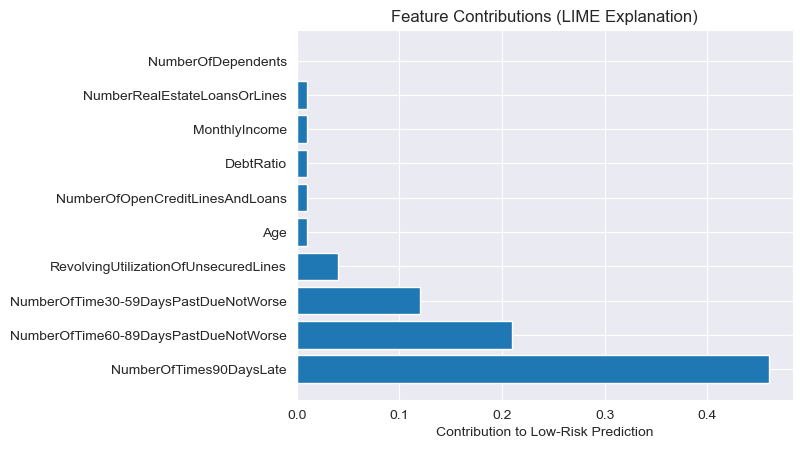

In [79]:
import matplotlib.pyplot as plt

features = ['NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTime30-59DaysPastDueNotWorse',
            'RevolvingUtilizationOfUnsecuredLines', 'Age', 'NumberOfOpenCreditLinesAndLoans',
            'DebtRatio', 'MonthlyIncome', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']
contributions = [0.46, 0.21, 0.12, 0.04, 0.01, 0.01, 0.01, 0.01, 0.01, 0.00]

plt.barh(features, contributions)
plt.xlabel('Contribution to Low-Risk Prediction')
plt.title('Feature Contributions (LIME Explanation)')
plt.show()

### Explainability Analysis Using LIME

We used LIME (Local Interpretable Model-agnostic Explanations) to interpret the model's prediction for a specific instance. Below are the key insights:

#### Prediction Probabilities
- **Low Risk**: 99%
- **High Risk**: 1%

#### Feature Contributions
The following table shows how each feature contributed to the prediction:

| Feature Name                          | Contribution |
|---------------------------------------|--------------|
| NumberOfTimes90DaysLate               | 0.46         |
| NumberOfTime60-89DaysPastDueNotWorse  | 0.21         |
| NumberOfTime30-59DaysPastDueNotWorse  | 0.12         |
| RevolvingUtilizationOfUnsecuredLines  | 0.04         |
| Age (-0.02 < age <= 0.72)             | 0.01         |
| NumberOfOpenCreditLinesAndLoans (-0.67 < ...) | 0.01 |
| DebtRatio (-0.17 < DebtRatio <= ...)  | 0.01         |
| MonthlyIncome (> 0.08)                | 0.01         |
| NumberRealEstateLoansOrLines (-0.90 < ...) | 0.01 |
| NumberOfDependents                    | 0.00         |

#### Key Insights
- The model's prediction of **low risk** is primarily driven by the borrower's **good payment history** (few late payments).
- Features like `MonthlyIncome` and `Age` had minimal impact on the prediction for this instance.

#### Implications
- **Borrowers**: Maintaining a good payment history is critical for being classified as low risk.
- **Lenders**: Payment history should be prioritized when evaluating loan applications.

# Partial Dependence Plots (PDPs)

PDPs help visualize the relationship between specific features and the predicted outcome. This is useful for understanding how changes in a feature affect the model's predictions globally.
Code for PDPs

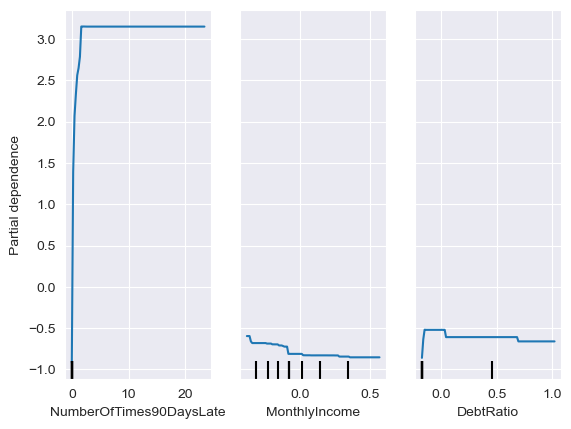

In [80]:
from sklearn.inspection import PartialDependenceDisplay

# Plot PDP for specific features
features_to_plot = ['NumberOfTimes90DaysLate', 'MonthlyIncome', 'DebtRatio']
PartialDependenceDisplay.from_estimator(best_model, X_val, features=features_to_plot, feature_names=X.columns)

### Partial Dependence Plots (PDPs)

We used Partial Dependence Plots (PDPs) to visualize the relationship between specific features and the predicted outcome. Below are the key insights:

#### 1. NumberOfTimes90DaysLate
- **Relationship**: As the number of late payments increases, the predicted probability of default increases.
- **Implications**:
  - Borrowers with 0 late payments have a low probability of default.
  - Borrowers with 20+ late payments have a high probability of default.

#### 2. MonthlyIncome
- **Relationship**: Higher income reduces the probability of default.
- **Implications**:
  - Borrowers with low income (e.g., $0–$10,000) are at higher risk of default.
  - Borrowers with higher income (e.g., $20,000+) are at lower risk of default.

#### 3. DebtRatio
- **Relationship**: A higher debt ratio increases the probability of default.
- **Implications**:
  - Borrowers with a low debt ratio (e.g., 0.0–0.5) are at lower risk of default.
  - Borrowers with a high debt ratio (e.g., 0.5–1.0) are at higher risk of default.

#### Key Takeaways
- **Borrowers**: Maintaining a good payment history, increasing income, and reducing debt can significantly lower the probability of default.
- **Lenders**: Focus on these key features (late payments, income, and debt ratio) when evaluating loan applications.

# Counterfactual Explanations

In [ ]:
from dice_ml import Dice


d = Dice(data=X_train, model=best_model)


query_instance = X_val.iloc[0:1]
counterfactuals = d.generate_counterfactuals(query_instance, total_CFs=3, desired_class=1)

# Visualize counterfactuals
counterfactuals.visualize_as_dataframe()